In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import sys

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import gym

In [3]:
env = gym.make('MsPacman-v0')

In [4]:
obs = env.reset()

In [5]:
obs.shape

(210, 160, 3)

In [6]:
img = env.render(mode="rgb_array")

<IPython.core.display.Javascript object>


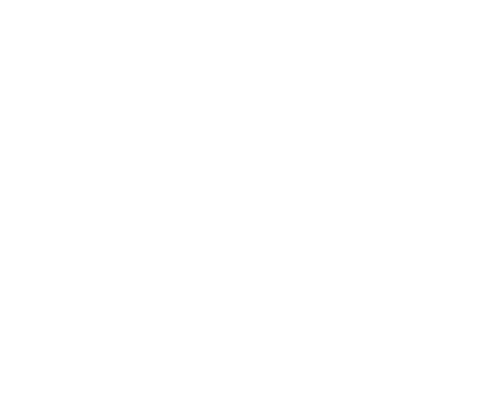

In [7]:
plt.figure(figsize=(5,4))
plt.imshow(img)
plt.axis("off")
plt.show()

In [8]:
(img == obs).all()

True

In [9]:
def plot_enviroment(env,figsize=(5,4)):
    plt.close()
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [10]:
env.action_space

Discrete(9)

In [11]:
env.reset()
for step in range(110):
    env.step(3)
for step in range(40):
    env.step(8)

<IPython.core.display.Javascript object>


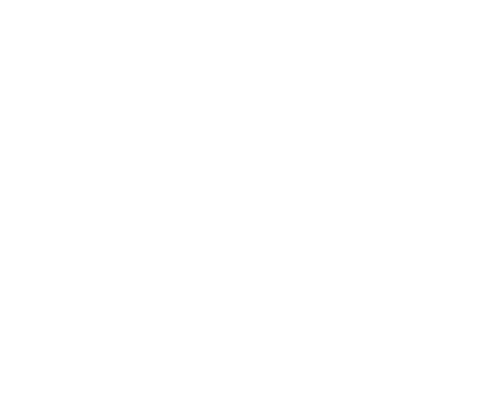

In [12]:
plot_enviroment(env)

In [13]:
obs, reward, done, info = env.step(0)

In [14]:
obs.shape

(210, 160, 3)

In [15]:
reward

0.0

In [16]:
done

False

In [17]:
info

{'ale.lives': 3}

In [18]:
frames = []
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if done:
        break

In [19]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames,repeat=False,interval=40):
    plt.close()
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene,fargs=(frames,patch),frames=len(frames),repeat=repeat, interval=interval)

<IPython.core.display.Javascript object>


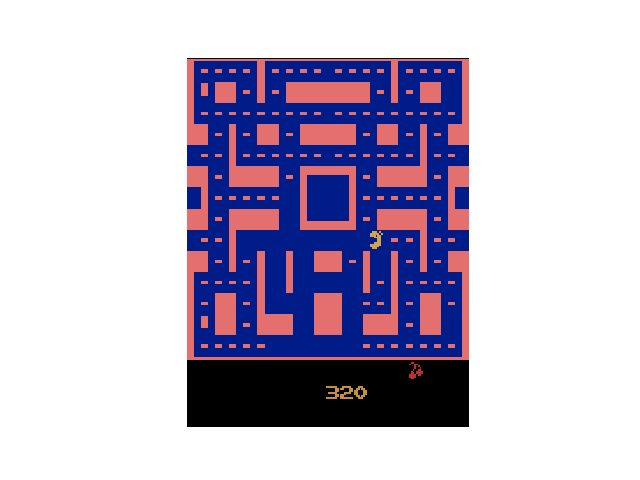

In [20]:
video = plot_animation(frames)
plt.show()

In [21]:
env.close()

In [22]:
env = gym.make("CartPole-v0")

/home/bartosz/anaconda3/envs/tensorflow/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [23]:
obs = env.reset()

In [24]:
obs

array([0.02092677, 0.01663192, 0.00924001, 0.00281666])

In [31]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True  
except Exception:
    openai_cart_pole_rendering = False  
def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        return env.render(mode="rgb_array")
    else:
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close() 
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


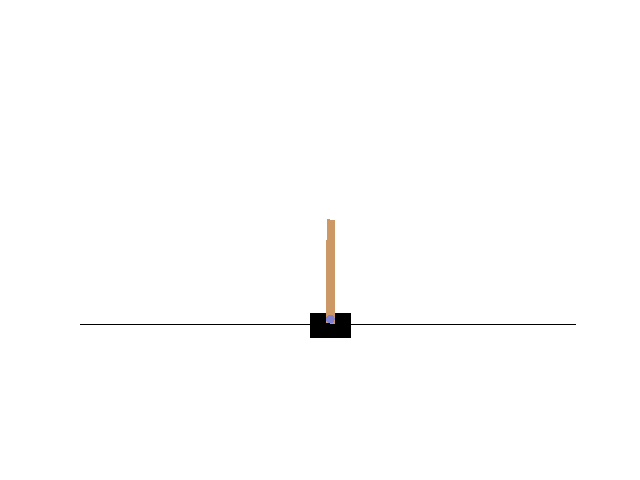

In [33]:
plot_cart_pole(env, obs)

In [34]:
env.action_space

Discrete(2)

In [35]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

<IPython.core.display.Javascript object>


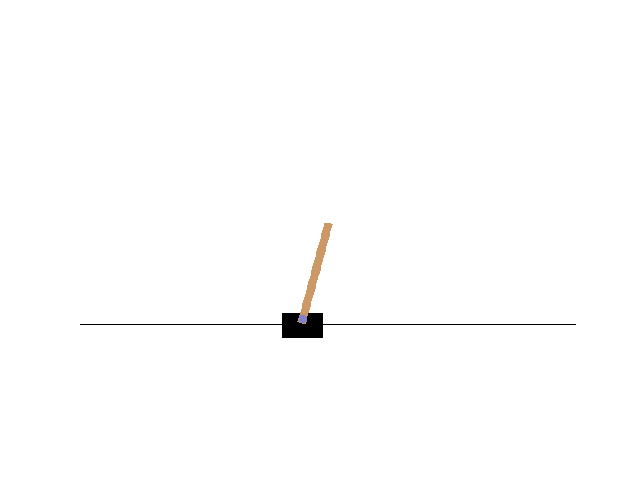

(-0.5, 599.5, 399.5, -0.5)

In [37]:
plt.close()
img = render_cart_pole(env,obs)
plt.imshow(img)
plt.axis("off")

In [38]:
img.shape

(400, 600, 3)

In [39]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break

<IPython.core.display.Javascript object>


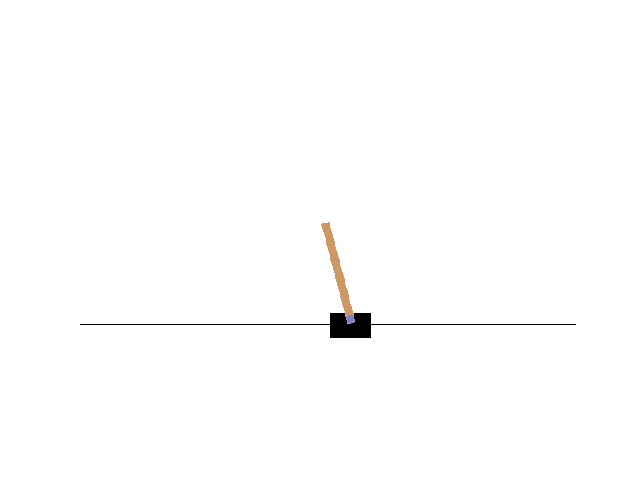

In [40]:
plot_cart_pole(env, obs)